#### Imports

Imports

In [1]:
import os

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Data.data

In [3]:
%matplotlib inline

Load data

In [7]:
folder = '../Output'
df = []

files = sorted(os.listdir(folder))
print(files)
for file in files:
    csv_filename = os.path.join(folder, file)
    csv_file = pd.read_csv(csv_filename)
    df.append(csv_file)

print(len(df))

['gizem_test_2020-06-02-21-51-06.csv']
1


In [8]:
df[0]

,global_time,elapsed_time,human_pitch,human_roll,human_yaw,mark
0,1.591127e+09,0.004806,0.000000,0.000000,0.000000,not-aided
1,1.591127e+09,0.027159,0.000000,0.000000,0.000000,not-aided
2,1.591127e+09,0.057186,0.000000,0.000000,0.000000,not-aided
3,1.591127e+09,0.087122,0.000000,0.000000,0.000000,not-aided
4,1.591127e+09,0.117222,0.000000,0.000000,0.000000,not-aided
...,...,...,...,...,...,...
980,1.591127e+09,29.397145,-0.276693,-0.316306,0.080278,not-aided
981,1.591127e+09,29.427144,-0.279728,-0.337716,0.076849,not-aided
982,1.591127e+09,29.457128,-0.278664,-0.359042,0.072615,not-aided
983,1.591127e+09,29.487134,-0.276004,-0.378395,0.068638,not-aided


Plot for time and motion

### MATPLOTLIB

#### Function way

In [ ]:
plt.subplot(1,3,1)
plt.plot(df[0]['elapsed_time'], df[0]['y_deg'])
plt.xlabel('Time')
plt.ylabel('Yaw (degrees)')
plt.title('YAW')
plt.subplot(1,3,2)
plt.plot(df[0]['elapsed_time'], df[0]['p_deg'])
plt.xlabel('Time')
plt.ylabel('Pitch (degrees)')
plt.title('PITCH')
plt.subplot(1,3,3)
plt.plot(df[0]['elapsed_time'], df[0]['r_deg'])
plt.xlabel('Time')
plt.ylabel('Roll (degrees)')
plt.title('ROLL')

#### Object Oriented way

fig = plt.figure()
axes = fig.add_axes([0, 10, 1, 1])
axes.plot(df[1]['elapsed_time'], df[0]['p_deg'])
axes.set_xlabel('Time')
axes.set_ylabel('Pitch (degrees)')
axes.set_title('PITCH')


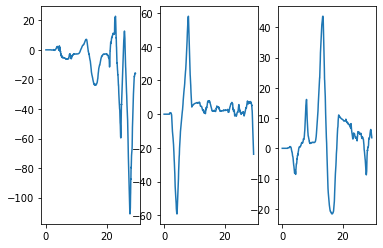

In [9]:
fig,axes = plt.subplots(nrows = 1, ncols = 3)
# plt.tight_layout()
axes[0].plot(df[0]['elapsed_time'], np.degrees(df[0]['human_pitch']))
axes[1].plot(df[0]['elapsed_time'], np.degrees(df[0]['human_roll']))
axes[2].plot(df[0]['elapsed_time'], np.degrees(df[0]['human_yaw']))

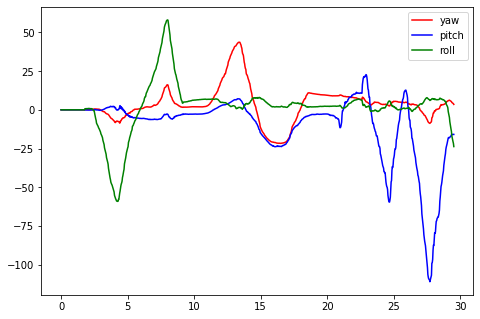

In [10]:
fig = plt.figure()
axis = fig.add_axes([0, 10, 1, 1])
axis.plot(df[0]['elapsed_time'], np.degrees(df[0]['human_yaw']),'r', label='yaw')
axis.plot(df[0]['elapsed_time'], np.degrees(df[0]['human_pitch']),'b', label='pitch')
axis.plot(df[0]['elapsed_time'], np.degrees(df[0]['human_roll']),'g', label='roll')

axis.legend()

NOTE: At the end of the plots, you can see that they don't go to zero. The reason is not the drift error, just a human motion fail.

DISCUSSION: The sequence is Pitch-Yaw-Roll. Here is interesting that I have more roll motion when yaw asked and more yaw when roll asked. Check that in the code. But if it is the case, then it adresses something interesting. Or maybe I need to change measurement method (directional Quaternion instead of rotation matrices)---Fixed! roll and yaw recorded wrong. Delete this note when you record new data.

#### Show the max angles in each axes:

In [56]:
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    print("{0:8.1f} degrees is at{1:8.1f} seconds.".format(ymax, xmax))
    text= "x={:.1f}, y={:.1f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

Pitch Max:

NameError: name 'annot_max' is not defined

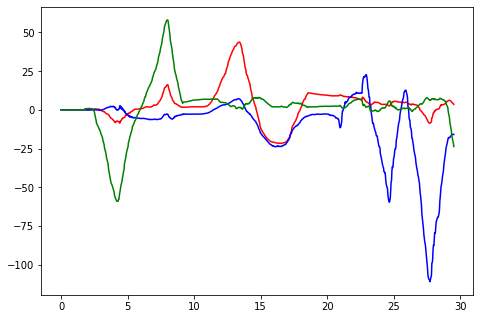

In [11]:
fig2 = plt.figure()
axis2 = fig2.add_axes([0, 10, 1, 1])
axis2.plot(df[0]['elapsed_time'], np.degrees(df[0]['human_yaw']),'r', label='yaw')
axis2.plot(df[0]['elapsed_time'], np.degrees(df[0]['human_pitch']),'b', label='pitch')
axis2.plot(df[0]['elapsed_time'], np.degrees(df[0]['human_roll']),'g', label='roll')

t = df[0]['elapsed_time']
pitch = np.degrees(df[0]['human_pitch'])
print("Pitch Max:", end='')
annot_max(t, pitch, ax=axis2)

yaw = np.degrees(df[0]['human_yaw'])
print("Yaw Max:", end='')
annot_max(t, yaw, ax=axis2)

roll = np.degrees(df[0]['human_roll'])
print("Roll Max:", end='')
annot_max(t, roll, ax=axis2)

axis2.legend()